In [7]:
import pandas as pd

# Load dataset
file_path = '/content/MaterialStrength.csv'
data = pd.read_csv(file_path)

# Display the first few rows and general information of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


(      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
 0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
 1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
 2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
 3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
 4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   
 
         x11  x12       x13  x14  x15  target_feature  
 0  1.538462    1  0.350044  YEs   NO           79.99  
 1  1.560651    1  0.452416  yES  nOO           61.89  
 2  1.569024    0  6.704743  yEs   NO           40.27  
 3  1.569024    0  8.891596  yes  NOO           41.05  
 4  1.185221    0  8.126411  YeS   no           44.30  ,
 None)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Data Preprocessing

# Define features (X) and target (y)
X = data.drop(columns=['target_feature'])
y = data['target_feature']

# Encode categorical columns
categorical_cols = ['x14', 'x15']
X[categorical_cols] = X[categorical_cols].apply(LabelEncoder().fit_transform)

# Normalize numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Convert target to binary classification (if necessary)
y = (y > y.median()).astype(int)  # Assuming binary classification based on median

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
classification_report_text = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

classification_report_text, roc_auc

((824, 15), (206, 15), (824,), (206,))

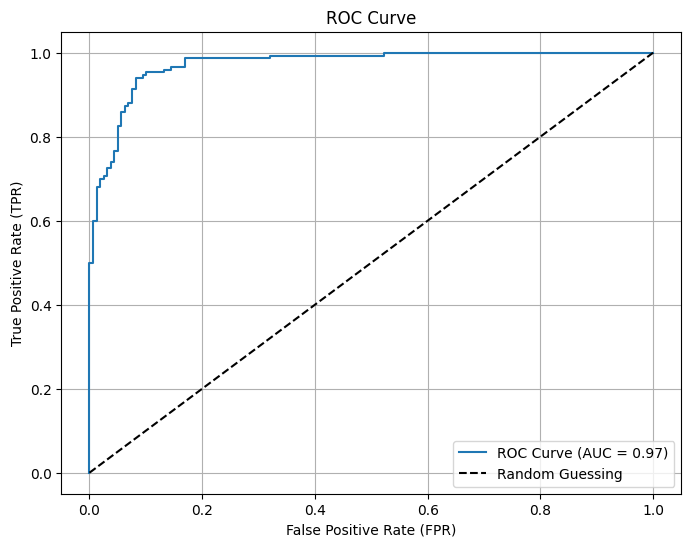

In [12]:
import matplotlib.pyplot as plt

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
